In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset
#Kaggle Dataset 다운로드

face-expression-recognition-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
%cd /content

!unzip -qq "/content/face-expression-recognition-dataset.zip"
#zip 압축해제

/content
replace images/images/train/angry/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
import shutil

dir_path = "/content/images/images/train/disgust"

if os.path.exists(dir_path):
    shutil.rmtree(dir_path)

dir_path = "/content/images/images/validation/disgust"

if os.path.exists(dir_path):
    shutil.rmtree(dir_path)
#필요없는 disgust 데이터터 삭제

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing important libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Importing Deep Learning Libraries

from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

# Displaying Images


In [ ]:
#taking inputs images for training
picture_size = 48
folder_path = "/content/images/images/"

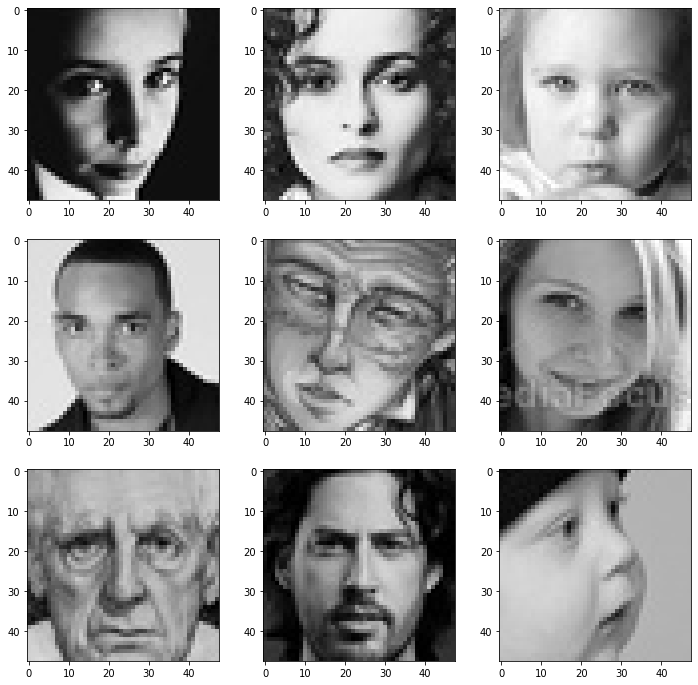

In [ ]:
#checking neutral image
expression = 'neutral'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Making Training and Validation Data


In [ ]:
#splitting data into train, test and validation set
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28385 images belonging to 6 classes.
Found 6955 images belonging to 6 classes.


# Model Building


In [ ]:
#building model with 6 classes
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 6

model = Sequential()

#1st CNN layer, BatchNormalization, Activation->relu, Maxpooling, Dropout 사용
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))

#2nd CNN layer, BatchNormalization, Activation->relu, Maxpooling, Dropout 사용
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.5))

#3rd CNN layer, BatchNormalization, Activation->relu, Maxpooling, Dropout 사용
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.5))

#4th CNN layer, BatchNormalization, Activation->relu, Maxpooling, Dropout 사용
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 activation_3 (Activation)   (None, 6, 6, 512)         0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 512)        0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 3, 3, 512)         0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1179904   
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 256)               0         
          

# Visualize model

The plot_model() function in Keras will create a plot of your network. This function takes a few useful arguments:

* model: (required) The model that you wish to plot.
* to_file: (required) The name of the file to which to save the plot.
* show_shapes: (optional, defaults to False) Whether or not to show the output shapes of each layer.
* show_layer_names: (optional, defaults to True) Whether or not to show the name for each lay

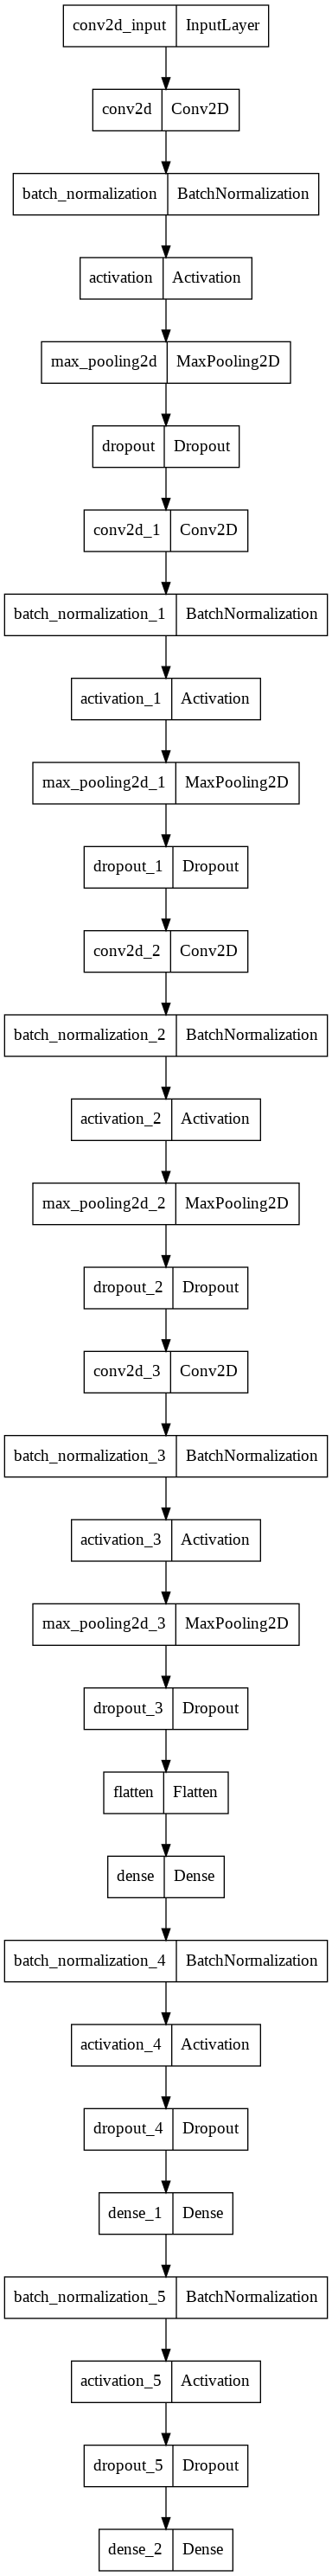

In [ ]:
#visualizing the model
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
)

# Fitting the Model with Training and Validation Data


In [ ]:
#importing tensorflow library and package
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("content/model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#Stopping training when a monitored metric has stopped improving.
early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=12,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=12,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
#fitting model with 48 epoch
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/50


<ipython-input-27-aab593e18fc5>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


220/221 [============================>.] - ETA: 0s - loss: 1.9883 - accuracy: 0.2246
Epoch 1: val_accuracy improved from -inf to 0.26982, saving model to content/model.h5
221/221 [==============================] - 25s 60ms/step - loss: 1.9874 - accuracy: 0.2248 - val_loss: 1.7931 - val_accuracy: 0.2698 - lr: 0.0010
Epoch 2/50
220/221 [============================>.] - ETA: 0s - loss: 1.7106 - accuracy: 0.3012
Epoch 2: val_accuracy did not improve from 0.26982
221/221 [==============================] - 13s 59ms/step - loss: 1.7099 - accuracy: 0.3014 - val_loss: 2.2188 - val_accuracy: 0.2645 - lr: 0.0010
Epoch 3/50
221/221 [==============================] - ETA: 0s - loss: 1.5394 - accuracy: 0.3812
Epoch 3: val_accuracy improved from 0.26982 to 0.31901, saving model to content/model.h5
221/221 [==============================] - 12s 56ms/step - loss: 1.5394 - accuracy: 0.3812 - val_loss: 1.8068 - val_accuracy: 0.3190 - lr: 0.0010
Epoch 4/50
220/221 [============================>.] - ETA: 

# Plotting Accuracy & Loss


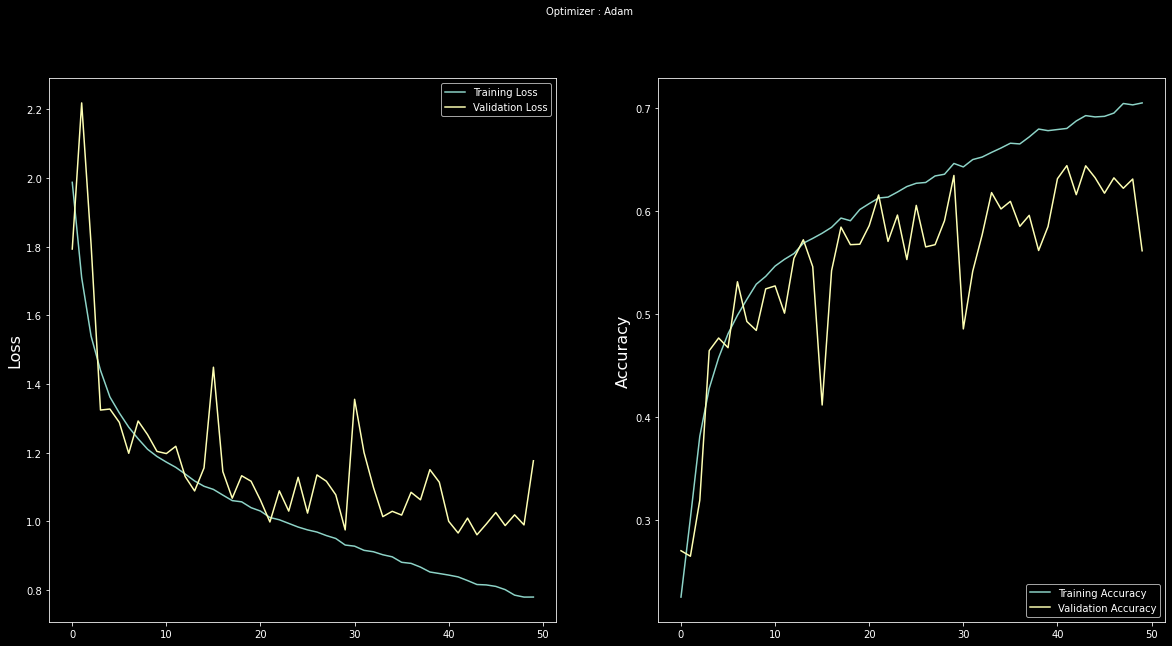

In [ ]:
#plotting graph to check accuracy and loss
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()